In [3]:
import findspark
findspark.find()
findspark.init('/home/ubuntu/spark/spark-3.1.2')

In [4]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

sc = SparkSession.builder.master("yarn").appName("pysparkMy").getOrCreate()

2025-03-21 06:27:42,900 WARN spark.SparkContext: Another SparkContext is being constructed (or threw an exception in its constructor). This may indicate an error, since only one SparkContext should be running in this JVM (see SPARK-2243). The other SparkContext was created at:
org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
java.base/jdk.internal.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
java.base/java.lang.reflect.Constructor.newInstance(Constructor.java:490)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.

In [5]:
sc

In [6]:
# load from hadoop data
hdfs_coffee_csv = sc.read.csv("hdfs:///test/ediya_starbucks_coffe_maps.csv",header=True)

In [7]:
df_coffee_csv=hdfs_coffee_csv.toPandas()
# print(df_coffee_csv)

In [8]:
import pandas as pd
import numpy as np
import folium
import time

from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

In [9]:
from matplotlib import font_manager
from matplotlib import rc
import matplotlib.pyplot as plt

In [10]:
df_coffee_csv["값"] = 1
df_coffee_csv.tail()

,_c0,매장이름,주소,구,브랜드,위도,경도,값
1155,1155,용산원효점,"서울 용산구 원효로 70 (원효로4가, 신정빌딩)",용산구,이디야,None,None,1
1156,1156,용산중앙점,서울 용산구 한강대로 52-1 (한강로3가),용산구,이디야,None,None,1
1157,1157,용산청파점,"서울 용산구 청파로71길 10 (청파동1가, 새마을금고)",용산구,이디야,None,None,1
1158,1158,용산효창점,서울 용산구 효창원로66길 2 (효창동),용산구,이디야,None,None,1
1159,1159,원효로점,서울 용산구 원효로 257 (원효로1가),용산구,이디야,None,None,1


<Axes: xlabel='구'>

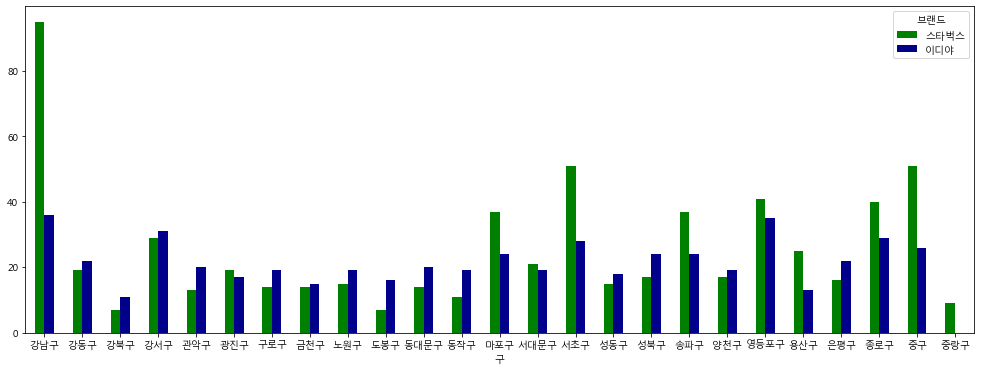

In [11]:
# 한글 글꼴 이름 조회
# f_path="/home/ubuntu/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/malgun.ttf"
# font_name = font_manager.FontProperties(fname=f_path).get_name()
# print (font_name)
font_name='Malgun Gothic'
plt.rc('font', family=font_name)
# rc("font", family=font_name)
rc("axes", unicode_minus=False)

get_ipython().run_line_magic("matplotlib", "inline")
df_coffee_count = df_coffee_csv.pivot_table(index="구", columns="브랜드", values="값", aggfunc=np.sum)
df_coffee_count.plot.bar(rot=0,  figsize=(17,6), color=["green", "darkblue"])

In [ ]:
# hadoop webui

# spark webui


# 데이터 web 크롤링 코드

# hadoop, spark 구성